In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv('C:/Users/tam05/downloads/Loan Prediction Problem Dataset/train_u6lujuX_CVtuZ9i.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#for numerical type
data ['LoanAmount'] = data ['LoanAmount'].fillna(data ['LoanAmount'].mean())
data ['Loan_Amount_Term'] = data ['Loan_Amount_Term'].fillna(data ['Loan_Amount_Term'].mean())
data ['Credit_History'] = data ['Credit_History'].fillna(data ['Credit_History'].mean())

In [6]:
#For ccategorical type 
data ['Gender'] = data ['Gender'].fillna(data['Gender'].mode()[0])
data ['Married'] = data ['Married'].fillna(data['Married'].mode()[0])
data ['Dependents'] = data ['Dependents'].fillna(data['Dependents'].mode()[0])
data ['Self_Employed'] = data ['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot: xlabel='Gender', ylabel='count'>

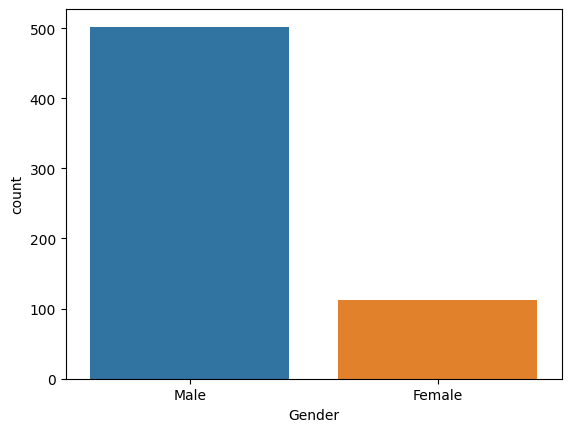

In [8]:
#for gender
sns.countplot(x='Gender',data=data)
#as we can see Male applicant is more as compared to Female

In [9]:
#How do women and men compare when it comes to defaulting on loans in the historical dataset?
comp=data[['Loan_Status','Gender']].value_counts().to_frame()
comp

,,0
Loan_Status,Gender,
Y,Male,347
N,Male,155
Y,Female,75
N,Female,37


<AxesSubplot: xlabel='Married', ylabel='count'>

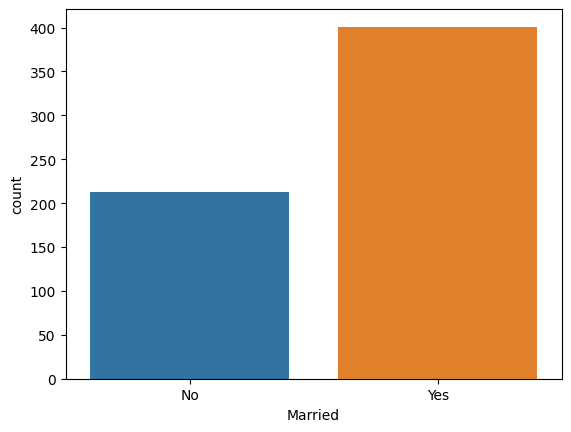

In [10]:
sns.countplot(x='Married',data=data)

<AxesSubplot: xlabel='Dependents', ylabel='count'>

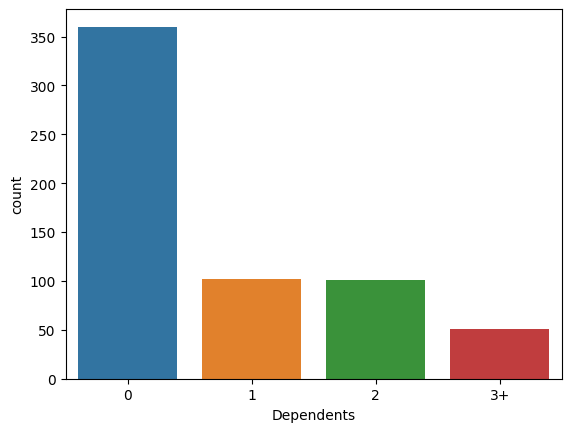

In [11]:
sns.countplot(x='Dependents',data=data)

<AxesSubplot: xlabel='Education', ylabel='count'>

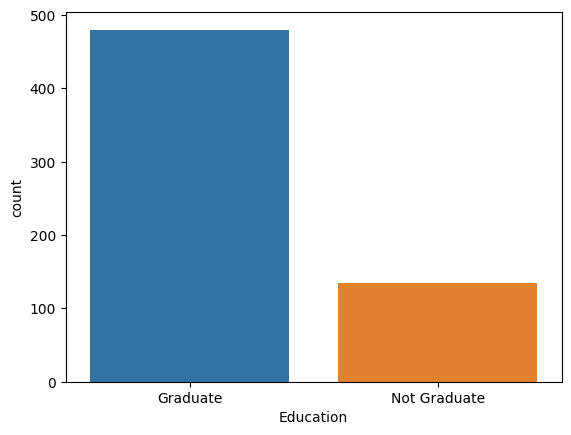

In [12]:
sns.countplot(x='Education',data=data)

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

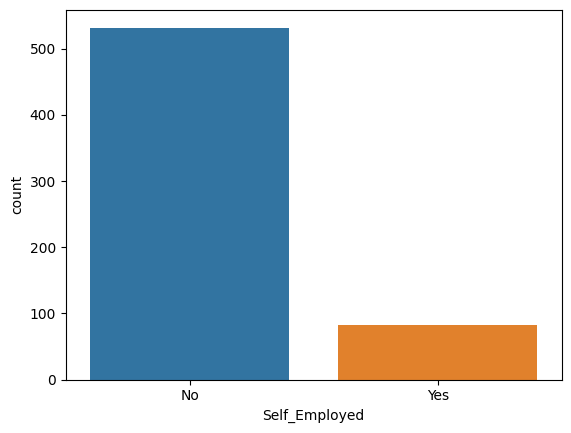

In [13]:
sns.countplot(x='Self_Employed',data=data)

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

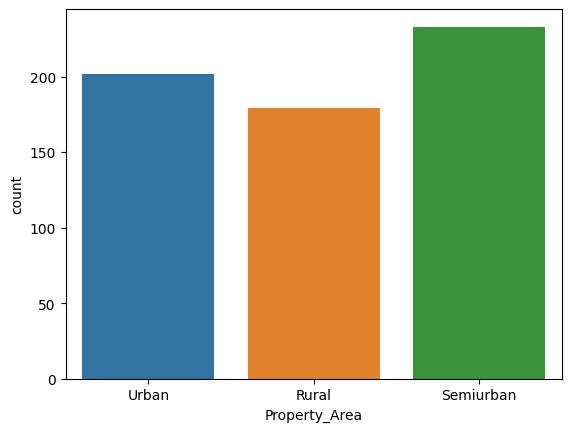

In [14]:
sns.countplot(x='Property_Area',data=data)

In [15]:
data['ApplicantIncome']= np.log(data['ApplicantIncome'])
data['CoapplicantIncome']= np.log(data['CoapplicantIncome']+1)
data['LoanAmount'] = np.log(data['LoanAmount'])
data['Loan_Amount_Term']= np.log(data['Loan_Amount_Term'])

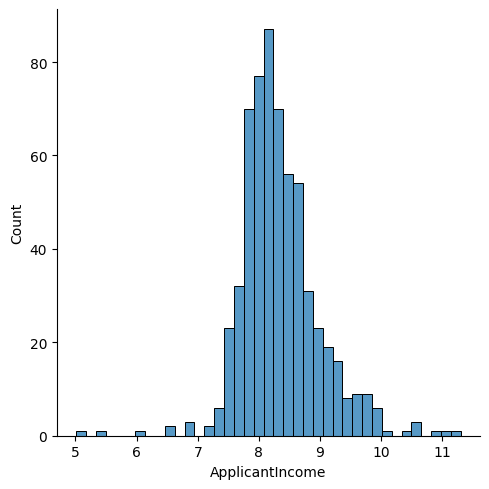

In [16]:
sns.displot(data['ApplicantIncome'])

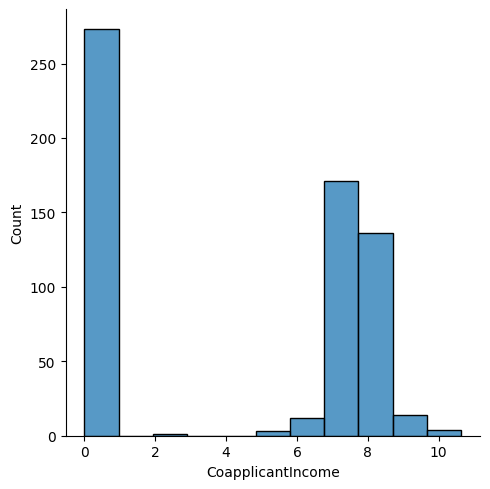

In [17]:
sns.displot(data['CoapplicantIncome'])

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

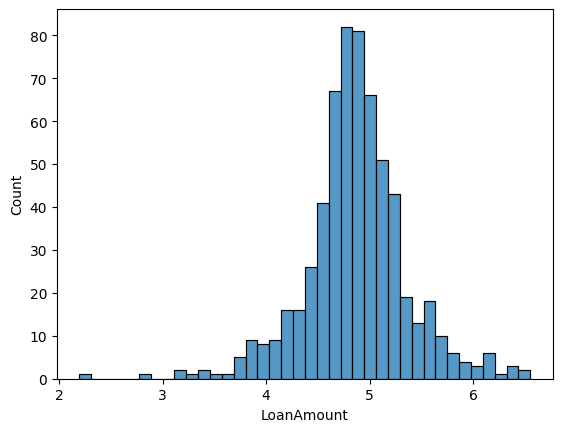

In [18]:
sns.histplot(data['LoanAmount'])

<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='Count'>

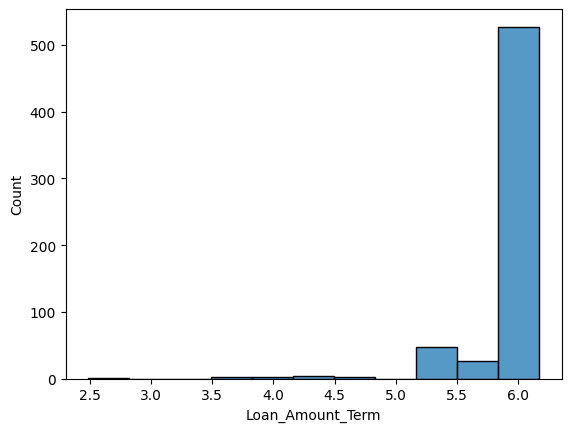

In [19]:
sns.histplot(data['Loan_Amount_Term'])

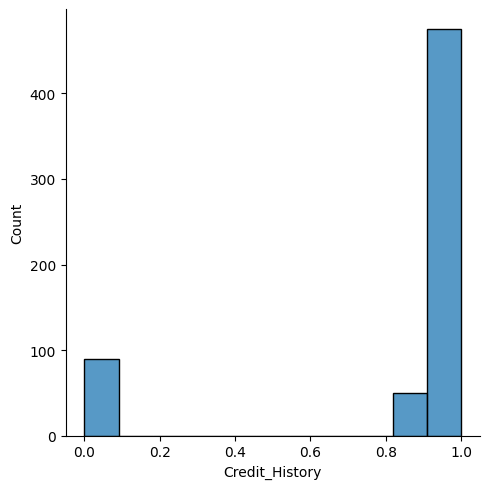

In [20]:
sns.displot(data['Credit_History'])

<AxesSubplot: >

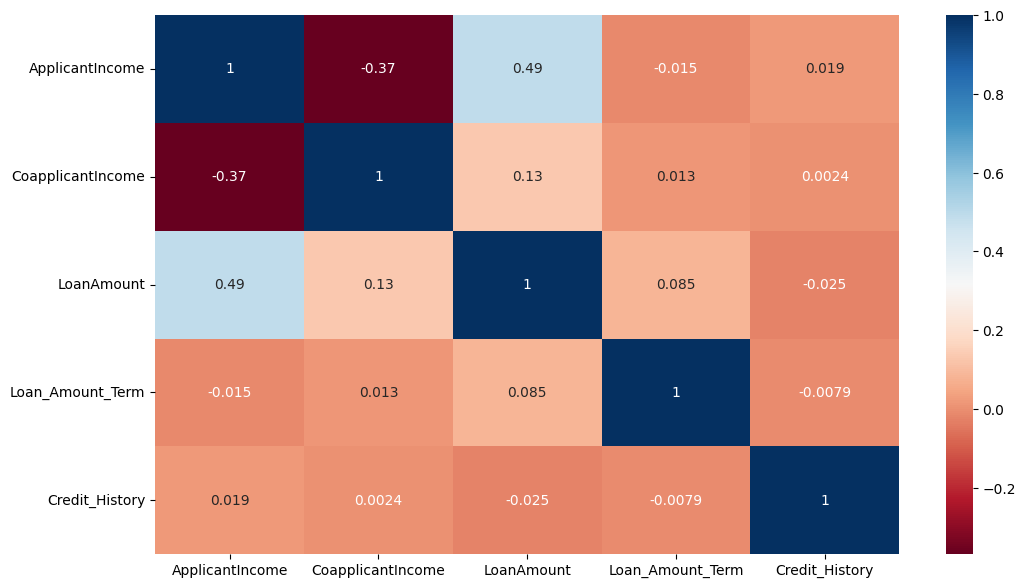

In [21]:
corr=data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True, cmap='RdBu')

In [22]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.986426,5.886104,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972466,0.000000,4.262680,5.886104,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,8.320205,0.000000,3.688879,5.192957,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8.996157,5.484797,5.533389,5.886104,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,8.933664,0.000000,5.231109,5.886104,1.0,Urban,Y


In [33]:
data_to_csv = data.drop(['Loan_ID','Loan_Status'], axis=1)
data_to_csv

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,8.674026,0.000000,4.986426,5.886104,1.0,Urban
1,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.0,Urban
4,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,0.000000,4.262680,5.886104,1.0,Rural
610,Male,Yes,3+,Graduate,No,8.320205,0.000000,3.688879,5.192957,1.0,Rural
611,Male,Yes,1,Graduate,No,8.996157,5.484797,5.533389,5.886104,1.0,Urban
612,Male,Yes,2,Graduate,No,8.933664,0.000000,5.231109,5.886104,1.0,Urban


In [34]:
data_to_csv.to_csv('C:/Users/tam05/Downloads/DM and DW/mysql.csv')

In [23]:
# Preprocess the data
data1 = pd.get_dummies(data, drop_first=True)

In [24]:
X = data1.drop(['Loan_Status_Y'], axis=1)
y = data1['Loan_Status_Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier using F1 score
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print("F1 score: {:.2f}".format(f1))

F1 score: 0.76


In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 83 to 102
Columns: 627 entries, ApplicantIncome to Property_Area_Urban
dtypes: float64(5), uint8(622)
memory usage: 321.3 KB


In [26]:
import joblib
joblib.dump(clf, 'loan_prediction_model.pkl')

['loan_prediction_model.pkl']

In [27]:
# Load the decision tree model from file
clf = joblib.load('loan_prediction_model.pkl')

# Load the column names for the feature variables
columns = pd.read_csv('C:/Users/tam05/downloads/Loan Prediction Problem Dataset/train_u6lujuX_CVtuZ9i.csv', nrows=0).columns[1:-1]
columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [30]:
# Define a function to get user input
def get_input():
    inputs = {}
    for col in columns:
        val = input("Enter {}: ".format(col))
        if col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
            val = float(val)
        elif col == 'Credit_History':
            val = int(val)
        inputs[col] = [val]
    df = pd.DataFrame(inputs)
    # Add missing columns with default values
    for col in X.columns:
        if col not in df.columns:
            df[col] = 0
    # Reorder columns to match training dataset
    df = df[X.columns]
    return df


# Define a function to predict loan approval status
def predict_loan_approval(inputs):
    # Preprocess the input data
    inputs = pd.get_dummies(inputs, drop_first=True)
#     print(inputs)
    # Make predictions using the decision tree model
    y_pred = clf.predict(inputs)
    # Get the reasons for the loan approval decision
    reasons = []
    if y_pred[0] == 0:
        reasons.append('Customer does not meet credit history requirement')
    if y_pred[0] == 1:
        reasons.append('Customer does meet credit history requirement')
    if inputs['ApplicantIncome'].values[0] + inputs['CoapplicantIncome'].values[0] < 5000 and y_pred[0] == 0:
        reasons.append('Customer does not meet income requirement')
    if inputs['ApplicantIncome'].values[0] + inputs['CoapplicantIncome'].values[0] > 5000 and y_pred[0] == 1:
        reasons.append('Customer does meet income requirement')
    if inputs['LoanAmount'].values[0] > 150 and y_pred[0] == 0:
        reasons.append('Customer exceeds loan amount requirement')
    if inputs['Property_Area_Semiurban'].values[0] == 0 and y_pred[0] == 0:
        reasons.append('Customer does not meet property area requirement')
    if inputs['Property_Area_Semiurban'].values[0] == 1 and y_pred[0] == 1:
        reasons.append('Customer does meet property area requirement')    
    return y_pred[0], reasons

# Get user input and make loan approval decision
inputs = get_input()
approval_status, reasons = predict_loan_approval(inputs)

reasons_sentence = ", ".join(reasons)

print("======================================================")
# Print the loan approval decision and reasons
if approval_status == 1:
    print("Loan application approved.")
else:
    print("Loan application denied.")
print("Reasons: {}.".format(reasons_sentence))

Enter Gender: Male
Enter Married: No
Enter Dependents: 0
Enter Education: Not Graduate
Enter Self_Employed: No
Enter ApplicantIncome: 3596
Enter CoapplicantIncome: 0
Enter LoanAmount: 100
Enter Loan_Amount_Term: 240
Enter Credit_History: 1
Enter Property_Area: Urban
Loan application approved.
Reasons: Customer does meet credit history requirement.


In [29]:
inputs

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Loan_ID_LP002990,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,3620.0,0.0,25.0,120.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
